# Australian House Price Prediction (Using Linear + Ridge + Lasso  Reg.)

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Importing Train Data 

In [28]:
train=pd.read_csv("C:\\Users\\ashis\\OneDrive\\Desktop\\UpGrad\\10. Advance Regression Assignment\\train_HousePrediction.csv")

#### Basic Sanity Test 

In [3]:
train.shape

(1460, 81)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Missing Values

In [29]:
#Checking missing %
ms=train.isna().sum()/len(train)*100

#List of Variable havig missing %>0
ms[ms!=0]


#OR

missing_features=[x for x in train.columns if train[x].isna().sum()>0]
for i in missing_features:
    print(i,round( (  (train[i].isna().sum())  /  len(train)  )*100 ,2))
    

LotFrontage 17.74
Alley 93.77
MasVnrType 0.55
MasVnrArea 0.55
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Electrical 0.07
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


#### ##### Dropping those Variable having missing % more than 90%   [Alley,  PoolQC  and  MiscFeature ]  also 
##### Removing one redudent var ['ID']  

In [30]:
train=train.drop(['Alley', 'PoolQC', 'MiscFeature','Id'], axis=1)

In [12]:
train.shape

(1460, 77)

### Missing value Imputation  

In [31]:
# 1. "LotFrontage: ~ 17% missing value"
train['LotFrontage']= train['LotFrontage'].fillna(train['LotFrontage'].median())
 
    
# 2. MasVnr
# 'MasVnrType' and 'MasVnrArea' has same missing rows, so it means house does not have 'MasVnr'
# There are 8 rows as NA so imputing mode of 'MasVnrType' which is 'None'
# Since MasVnrType is imputed as 'None'(using Mode) so imputing MasVnrArea as Zero
train['MasVnrType']= train.fillna(train['MasVnrType'].mode())
train['MasVnrArea']= train['MasVnrArea'].fillna(0)
#Or                  train['MasVnrArea'].replace(np.nan, 0)


# 3. Basement
# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2' has same missing rows, so it means there is 'No Basement' in the house

train['BsmtQual']= train['BsmtQual'].fillna('No Basement')
train['BsmtCond']= train['BsmtCond'].fillna('No Basement')

#BsmtExposure is NA when Basement category as 'No Basement'
train.loc[(train['BsmtExposure'].isna()) & (train['BsmtQual']=='No Basement'), 'BsmtExposure']='Missing'

#BsmtExposure is NA when Basement category is NOT 'No Basement'
#train['BsmtExposure'].mode()
train.loc[(train['BsmtExposure'].isna()) & (train['BsmtQual']!='No Basement'), 'BsmtExposure']=train['BsmtExposure'].mode()[0]

#BsmtFinType1 is NA when Basement category as 'No Basement'
train['BsmtFinType1']=train['BsmtFinType1'].fillna("No Basement")

#BsmtFinType2 is NA when Basement category is 'No Basement'
train.loc[(train['BsmtFinType2'].isna()) & (train['BsmtQual']=='No Basement'), 'BsmtFinType2']='Missing'
#BsmtFinType2 is NA when Basement category is NOT 'No Basement'
train.loc[(train['BsmtFinType2'].isna()) & (train['BsmtQual']!='No Basement'), 'BsmtFinType2']=train['BsmtFinType2'].mode()[0]


# 4. Garage
# 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond' are missing because the house doesn't have Garage
# Missing values in these variabkes are not missing at  random
train['GarageType']= train['GarageType'].fillna('No Garage')

#imputing with 0 as we will not bucket this feature and model will not acept string,  
train['GarageYrBlt']= train['GarageYrBlt'].fillna(0)
train['GarageFinish']= train['GarageFinish'].fillna('No Garage')
train['GarageQual']= train['GarageQual'].fillna('No Garage')
train['GarageCond']= train['GarageCond'].fillna('No Garage')



# 5. Fireplace
# NA is not a missing value, as NA represents 'No Fireplace' (mentioed in data dictionary)
train['FireplaceQu']= train['FireplaceQu'].fillna('No Fireplace')



# 6. Fence
# NA is not a missing value, as NA represents 'No Fence' (mentioed in data dictionary)
train['Fence']= train['Fence'].fillna('No Fence')



# 7. Electrical
# NA is a missing value, so imputing mode  
train['Electrical']= train.fillna(train['Electrical'].mode())

In [32]:
#Checking missing once again
missing_features=[x for x in train.columns if train[x].isna().sum()>0]
for i in missing_features:
    print(i,round( (  (train[i].isna().sum())  /  len(train)  )*100 ,2))
    

##### Craeting Derived Variables 

In [33]:
# 'TotalBsmtSF' is cobination of BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF, so removing these three variables
# 'GrLivArea' is cobination of 1stFlrSF + 2ndFlrSF + LowQualFinSF, so removing these three variables


train.drop(columns=['BsmtFinSF1', 'BsmtFinSF2' , 'BsmtUnfSF', '1stFlrSF' , '2ndFlrSF' , 'LowQualFinSF'], inplace=True)

In [12]:
train.shape

(1460, 71)

#### Checking for integer and categorical variables

In [34]:
#checking for categorical variables

train_obj=train.select_dtypes(['object'])

print(train_obj.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


In [35]:
# Checking for Numeric data
train_num=train.select_dtypes(['int64','float64'])

print(train_num.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [36]:
# Checking value_counts of category for each categorical variables
for i in enumerate(train_obj):
    print(train[i[1]].value_counts())


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

#### There are few more categorical features which are reflecting as Integer,  So coverting them as 'Object'  

In [37]:
#Converting categorical feature as Object

Ordinal_Cat=['OverallQual','OverallCond' ]
Nominal_Cat=['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', ]

#Creating common list by combining Ordinal and Nominal
Total_Missed_Catogorical=['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
                     'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                     'MiscFeature', 'MoSold', 'YrSold']

#Converting them into object 
train[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
       'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars',  'MoSold', 
       'YrSold']]=train[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
       'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars',  'MoSold', 
       'YrSold']].astype(object)




#train.columns

#### Creating Buckets

In [38]:
## Few variables has many catgories, so bucketing them in order to decrease redundent categories


# MSZoning(RL-79% , RM-15%  and FV+RH+C - 6%, so puting FV+RH+C into one bucket as  'Others'  )
train['MSZoning'][(train['MSZoning']=='FV') | (train['MSZoning']=='RH') | (train['MSZoning']=='C (all)')]='Others'


#Similrl exercise for all other variables

train['MSSubClass'][(train['MSSubClass']==190) | (train['MSSubClass']==85) | (train['MSSubClass']==75)|
                    (train['MSSubClass']==45) | (train['MSSubClass']==180) | (train['MSSubClass']==40) ]='Others'


train['Neighborhood'][(train['Neighborhood']=='Gilbert') | (train['Neighborhood']=='NridgHt') | (train['Neighborhood']=='Sawyer')|
                     (train['Neighborhood']=='NWAmes') | (train['Neighborhood']=='SawyerW') | (train['Neighborhood']=='BrkSide')|
                     (train['Neighborhood']=='Crawfor') | (train['Neighborhood']=='Mitchel') | (train['Neighborhood']=='NoRidge')|
                     (train['Neighborhood']=='Timber') | (train['Neighborhood']=='IDOTRR') | (train['Neighborhood']=='ClearCr')|
                     (train['Neighborhood']=='SWISU') | (train['Neighborhood']=='StoneBr') | (train['Neighborhood']=='MeadowV')|
                     (train['Neighborhood']=='Blmngtn') | (train['Neighborhood']=='BrDale') | (train['Neighborhood']=='Veenker')|
                     (train['Neighborhood']=='NPkVill') | (train['Neighborhood']=='Blueste')]='Others'


train['Condition1'][(train['Condition1']=='Feedr') | (train['Condition1']=='Artery') | (train['Condition1']=='RRAn')|
                    (train['Condition1']=='PosN') | (train['Condition1']=='RRAe') | (train['Condition1']=='PosA') |
                    (train['Condition1']=='RRNn') | (train['Condition1']=='RRNe') ]='Others'


train['Condition2'][(train['Condition2']=='Feedr') | (train['Condition2']=='Artery') | (train['Condition2']=='RRAn')|
                    (train['Condition2']=='PosN') | (train['Condition2']=='RRAe') | (train['Condition2']=='PosA') |
                    (train['Condition2']=='RRNn') ]='Others'


train['BldgType'][(train['BldgType']=='TwnhsE') | (train['BldgType']=='Duplex') | (train['BldgType']=='Twnhs')|
                    (train['BldgType']=='2fmCon') ]='Others'


train['HouseStyle'][(train['HouseStyle']=='SLvl') | (train['HouseStyle']=='SFoyer') | (train['HouseStyle']=='1.5Unf')|
                    (train['HouseStyle']=='2.5Fin') ]='Others'




train['RoofStyle'][(train['RoofStyle']=='Flat') | (train['RoofStyle']=='Gambrel') | (train['RoofStyle']=='Mansard')|
                    (train['RoofStyle']=='Shed') ]='Others'



train['RoofMatl'][(train['RoofMatl']=='Tar&Grv') | (train['RoofMatl']=='WdShngl') | (train['RoofMatl']=='WdShake')|
                  (train['RoofMatl']=='Metal') | (train['RoofMatl']=='Roll') | (train['RoofMatl']=='ClyTile') |
                  (train['RoofMatl']=='Membran')]='Others'



train['Exterior1st'][(train['Exterior1st']=='CemntBd') | (train['Exterior1st']=='BrkFace') | (train['Exterior1st']=='WdShing')|
                     (train['Exterior1st']=='Stucco') | (train['Exterior1st']=='AsbShng') | (train['Exterior1st']=='BrkComm') |
                     (train['Exterior1st']=='Stone') | (train['Exterior1st']=='AsphShn') | (train['Exterior1st']=='ImStucc')|
                     (train['Exterior1st']=='CBlock') ]='Others'


train['Exterior2nd'][(train['Exterior2nd']=='CemntBd') | (train['Exterior2nd']=='Wd Sdng') | (train['Exterior2nd']=='Stucco')|
                     (train['Exterior2nd']=='BrkFace') | (train['Exterior2nd']=='AsbShng') | (train['Exterior2nd']=='ImStucc') |
                     (train['Exterior2nd']=='Brk Cmn') | (train['Exterior2nd']=='Stone') | (train['Exterior2nd']=='AsphShn')|
                     (train['Exterior2nd']=='Other') | (train['Exterior2nd']=='CBlock') ]='Others'



##need to covert it onto object first ##############################333 
train['MasVnrType']=train.astype(object)

train['MasVnrType'][(train['MasVnrType']==120) | (train['MasVnrType']==30) | (train['MasVnrType']==160)|
                     (train['MasVnrType']==70) | (train['MasVnrType']==80) | (train['MasVnrType']==90) |
                     (train['MasVnrType']==190) | (train['MasVnrType']==85) | (train['MasVnrType']==75)|
                     (train['MasVnrType']==45) | (train['MasVnrType']==180) | (train['MasVnrType']==40) ]='Others'


train['ExterCond'][(train['ExterCond']=='Fa') | (train['ExterCond']=='Ex') | (train['ExterCond']=='Po') ]='Others'


train['Foundation'][(train['Foundation']=='Slab') | (train['Foundation']=='Stone') | (train['Foundation']=='Wood')]='Others'



train['Heating'][(train['Heating']=='GasW') | (train['Heating']=='Grav') | (train['Heating']=='Wall') |
                 (train['Heating']=='OthW') | (train['Heating']=='Floor')]='Others'


train['Electrical']=train['Electrical'].astype(object)
train['Electrical'][(train['Electrical']==190) | (train['Electrical']==85) | (train['Electrical']==75) |
                    (train['Electrical']==45) | (train['Electrical']==180) | (train['Electrical']==40)]='Others'


train['Functional'][(train['Functional']=='Min2') | (train['Functional']=='Min1') | (train['Functional']=='Mod') |
                    (train['Functional']=='Maj1') | (train['Functional']=='Maj2') | (train['Functional']=='Sev')]='Others'



train['FireplaceQu'][(train['FireplaceQu']=='Fa') | (train['FireplaceQu']=='Ex') | (train['FireplaceQu']=='Po') ]='Others'


train['GarageType'][(train['GarageType']=='BuiltIn') | (train['GarageType']=='No Garage') | (train['GarageType']=='Basment') |
                   (train['GarageType']=='CarPort') | (train['GarageType']=='2Types')]='Others'


train['GarageQual'][(train['GarageQual']=='No Garage') | (train['GarageQual']=='Fa') | (train['GarageQual']=='Gd') |
                   (train['GarageQual']=='Ex') | (train['GarageQual']=='Po')]='Others'


train['GarageCond'][(train['GarageCond']=='No Garage') | (train['GarageCond']=='Fa') | (train['GarageCond']=='Gd') |
                   (train['GarageCond']=='Ex') | (train['GarageCond']=='Po')]='Others'



train['SaleType'][(train['SaleType']=='COD') | (train['SaleType']=='ConLD') | (train['SaleType']=='ConLI') |
                   (train['SaleType']=='ConLw') | (train['SaleType']=='CWD') | (train['SaleType']=='Oth') |
                  (train['SaleType']=='Con')]='Others'


##Converted features
train['OverallQual'][(train['OverallQual']==9) | (train['OverallQual']==3) | (train['OverallQual']==10) |
                   (train['OverallQual']==2) | (train['OverallQual']==1) ]='Others'


train['OverallCond'][(train['OverallCond']==8) | (train['OverallCond']==4) | (train['OverallCond']==3) |
                   (train['OverallCond']==9) | (train['OverallCond']==2) |(train['OverallCond']==1) ]='Others'


train['BedroomAbvGr'][(train['BedroomAbvGr']==1) | (train['BedroomAbvGr']==5) | (train['BedroomAbvGr']==6) |
                   (train['BedroomAbvGr']==0) | (train['BedroomAbvGr']==8)  ]='Others'


train['TotRmsAbvGrd'][(train['TotRmsAbvGrd']==10) | (train['TotRmsAbvGrd']==11) | (train['TotRmsAbvGrd']==3) |
                   (train['TotRmsAbvGrd']==12) | (train['TotRmsAbvGrd']==14) | (train['TotRmsAbvGrd']==2)  ]='Others'


#train['MSZoning'].value_counts()

In [397]:
#train['TotRmsAbvGrd'].value_counts()

In [39]:
#Rechacking for variables and it's datatype

#Object variables:
train_obj= train.select_dtypes(['object'])
train_obj.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [40]:
# Rechecking for int/float variables
train_int=train.select_dtypes(['int64', 'float64'])
train_int.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

### Checking for Outliers

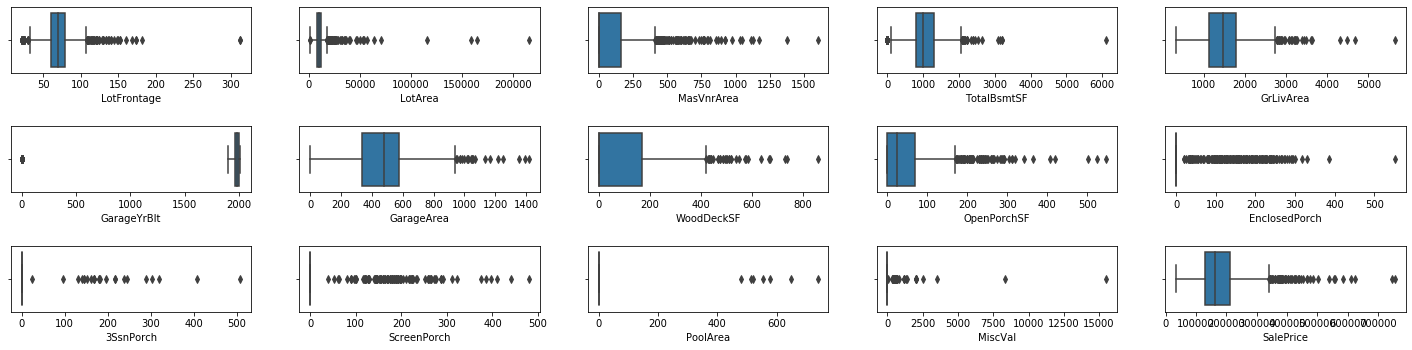

In [19]:
#Creating Boxplot( to check outliers)
from matplotlib import pyplot as plt

plt.figure(figsize=(25,10))
plt.subplots_adjust(hspace=0.8)
 

for i in enumerate(train_int):
    plt.subplot(5,5,i[0]+1)
    sns.boxplot(train[i[1]])
    

In [314]:
# Most of the features are right skewed (outlier at heigher side)

# Removing Outlier using 'Inter Quantile Range Proximity Rule'

'''
#MSSubClass
P25_Mclass=train['WoodDeckSF'].quantile(.25)
P75_Mclass=train['WoodDeckSF'].quantile(.75)

IQR_Mclass=P75_Mclass-P25_Mclass

upper_limit= P75_Mclass + 1.5*IQR_Mclass
lower_limit= P25_Mclass - 1.5*IQR_Mclass

print(P25_Mclass,P75_Mclass,IQR_Mclass,lower_limit, upper_limit,train['WoodDeckSF'].max())

  
#print(train['MasVnrArea'].max())
'''

0.0 168.0 168.0 -252.0 420.0 857


In [775]:
#Checking for P25,P75 nd IQR for all variables
for i in enumerate(train_int):
    P25=train[i[1]].quantile(0.25)
    P75=train[i[1]].quantile(0.75)
    IQR=P75-P25
    print(i,P25,P25,IQR)

(0, 'LotFrontage') 60.0 60.0 19.0
(1, 'LotArea') 7553.5 7553.5 4048.0
(2, 'MasVnrArea') 0.0 0.0 164.25
(3, 'TotalBsmtSF') 795.75 795.75 502.5
(4, 'GrLivArea') 1129.5 1129.5 647.25
(5, 'GarageYrBlt') 1958.0 1958.0 43.0
(6, 'GarageArea') 334.5 334.5 241.5
(7, 'WoodDeckSF') 0.0 0.0 168.0
(8, 'OpenPorchSF') 0.0 0.0 68.0
(9, 'EnclosedPorch') 0.0 0.0 0.0
(10, '3SsnPorch') 0.0 0.0 0.0
(11, 'ScreenPorch') 0.0 0.0 0.0
(12, 'PoolArea') 0.0 0.0 0.0
(13, 'MiscVal') 0.0 0.0 0.0
(14, 'SalePrice') 129975.0 129975.0 84025.0


In [293]:
# Haneling outlier for all Numeric variables 

'''def OL_Trtmnt(x):
    if x>upper_limit:
        return upper_limit
    else:
        return x


for i in enumerate(train_int):
    P25=train[i[1]].quantile(.25)
    P75=train[i[1]].quantile(.75)
    IQR=P75-P25
    #print(i[1], P25, P75, IQR)
    train[i[1]]=train[i[1]].apply(OL_Trtmnt)
 

'''


### Plotting Scatterplot to understand :
#### 1. Outlier Pattern
#### 2. Also Identifying the pattern of these variables against Target Variable (* 'SalesPrice'*  )

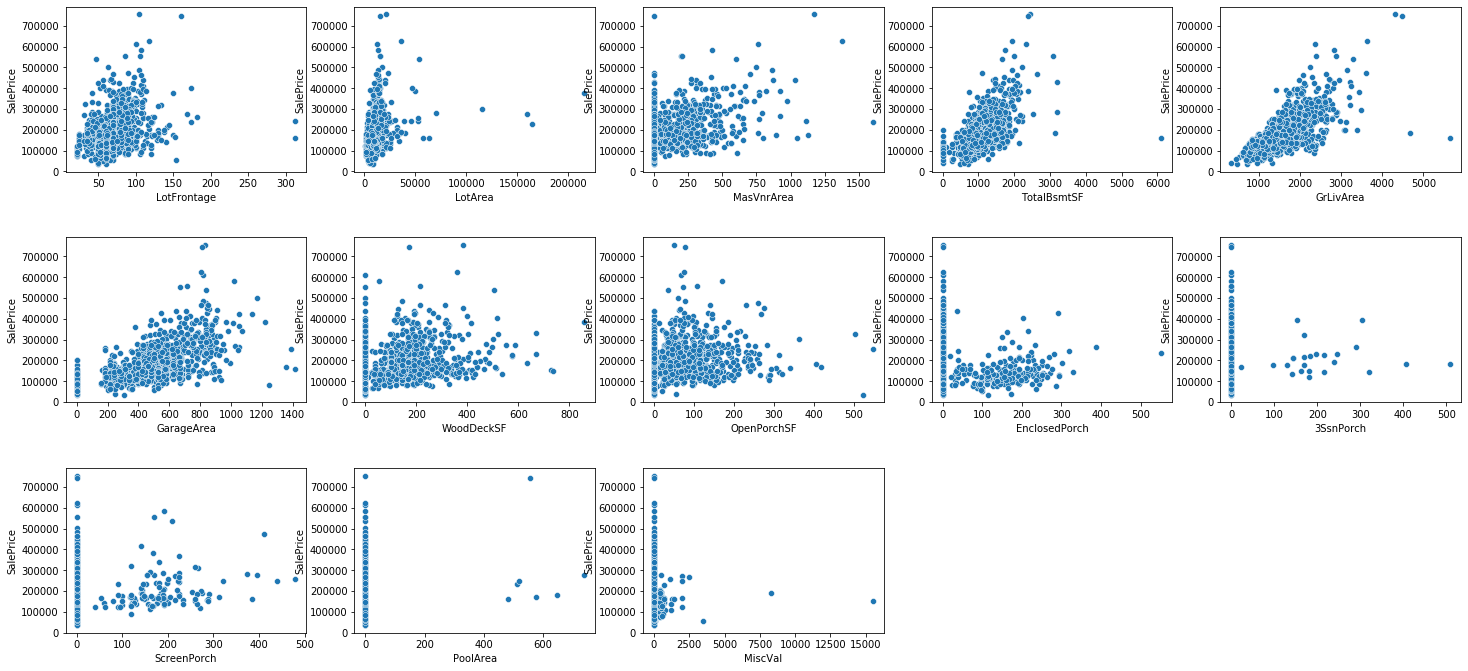

In [20]:
col_choice=['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                   'ScreenPorch','PoolArea','MiscVal' ] 
x_col="SalePrice"

#Subplot adjustment for proper width between the plots)
plt.figure(figsize=(25,20))
plt.subplots_adjust(hspace=0.4)

for i in enumerate(col_choice):
    plt.subplot(5,5,i[0]+1)
    sns.scatterplot(train.loc[:,i[1]], train[x_col])


### Checking Correlation 

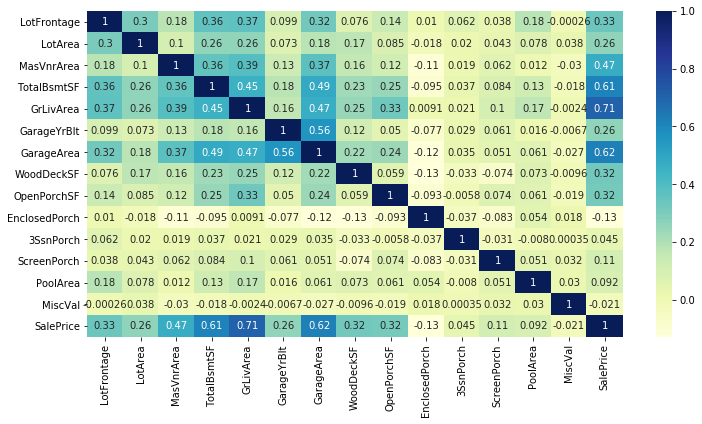

In [21]:
cor=train_int.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap="YlGnBu", annot=True)

In [22]:
corr_train_int=train_int.drop(columns=['SalePrice'])
corr_train_int

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,856,1710,2003.0,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,1262,1262,1976.0,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,920,1786,2001.0,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,756,1717,1998.0,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,1145,2198,2000.0,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,953,1647,1999.0,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,1542,2073,1978.0,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,1152,2340,1941.0,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,1078,1078,1950.0,240,366,0,112,0,0,0,0


##### Correlation seems to be okay 

### Checking Multicollinearity 

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

corr_train_int=train_int.drop(columns=['SalePrice'])

#train_int

vif_data = pd.DataFrame() 
vif_data["feature"] = corr_train_int.columns 

#print(X.values)

vif_data["VIF"] = [variance_inflation_factor(corr_train_int.values, i) for i in range(len(corr_train_int.columns))]

vif_data.sort_values(by="VIF" , ascending=False)


,feature,VIF
4,GrLivArea,14.474262
5,GarageYrBlt,14.209459
0,LotFrontage,12.447283
6,GarageArea,12.020467
3,TotalBsmtSF,10.441081
1,LotArea,2.456391
7,WoodDeckSF,1.802514
8,OpenPorchSF,1.744048
2,MasVnrArea,1.695017
9,EnclosedPorch,1.202352


#### Creating Dummy Variables (for categorical variables) 

In [24]:
train_obj.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [42]:
## Creating Dummy Variables

train=pd.get_dummies(train, columns=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual','OverallCond', 
        'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType',  'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], drop_first=True)

#Ordinal data Encoding
#Ordinal_Cat=['OverallQual','OverallCond' ]

### Scaling of variables

In [782]:
# Performing Robust Scaling (as it also handles outlier in the data)

In [43]:
from sklearn.preprocessing import RobustScaler
RScaler= RobustScaler()

#Transforming

train[['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']]= RScaler.fit_transform(train_int[['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']])


In [44]:
train.describe()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.045458,0.256504,0.627806,0.131203,0.079511,1868.739726,-0.029068,0.560979,0.318533,21.954110,...,0.208219,0.231507,0.119863,0.048630,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,1.159351,2.465728,1.100343,0.873045,0.811866,453.697295,0.885320,0.746064,0.974353,61.119149,...,0.406174,0.421940,0.324913,0.215167,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,-2.526316,-2.020380,0.000000,-1.973134,-1.745848,0.000000,-1.987578,0.000000,-0.367647,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.473684,-0.475543,0.000000,-0.389552,-0.516802,1958.000000,-0.602484,0.000000,-0.367647,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1977.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.526316,0.524457,1.000000,0.610448,0.483198,2001.000000,0.397516,1.000000,0.632353,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.842105,50.831645,9.741248,10.186070,6.455002,2010.000000,3.884058,5.101190,7.676471,552.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
train.shape

(1460, 197)

### Spliting Target and Response Variable

In [45]:
X=train.drop(columns=['SalePrice'])
y=train['SalePrice'] 

### Train Test Split  (test will be my validation data)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=99)

In [174]:
X_train.shape

(1168, 196)

## Creating Model

### 1. Linear Regression

In [47]:
from sklearn.linear_model  import LinearRegression

In [48]:
Linear_Reg= LinearRegression()

Linear_Reg_fit= Linear_Reg.fit(X_train,y_train)

In [49]:
#Prediction-Train
y_train_pred=Linear_Reg_fit.predict(X_train)

#Prediction-Test
y_test_pred= Linear_Reg_fit.predict(X_test)

In [50]:
#R2 Score (Train)
from sklearn.metrics import r2_score
print(f"R2 Score for Train data is:{r2_score(y_train, y_train_pred)}")
#print(r2_score(y_train, y_pred_train)      
print(f"R2 Score for Train data is:{r2_score(y_test, y_test_pred)}")      

R2 Score for Train data is:0.8840749360612966
R2 Score for Train data is:0.855023094873695


#### Model Coefficients 

In [51]:
# Intercept
print(f"Intercept for Linear Regression is: {Linear_Reg_fit.intercept_}")

Intercept for Linear Regression is: -5.030766789144221


In [52]:
#Beta Coefficients 
len(Linear_Reg_fit.coef_)

196

#### Metrics to check Model Performance

In [53]:
#RSS (Residual Sum of Square)
RSS=np.sum(np.square(y_test, y_test_pred))

#MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_test_pred)

#RMSE
RMSE=MSE**0.5

print(f"RSS for Linear Reg. is: {RSS}")
print(f"MSE for Linear Reg. is: {MSE}")
print(f"RMSE for Linear Reg. is: {RMSE}")

RSS for Linear Reg. is: 210.33799552275474
MSE for Linear Reg. is: 1.7455312102733744
RMSE for Linear Reg. is: 1.3211855321162786


### Residual Analysis

Text(0, 0.5, 'Residuals')

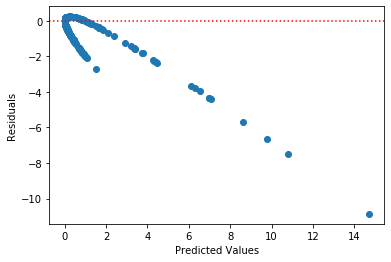

In [54]:
# 1. Residual Pattern
Residual=y_test-y_test_pred
plt.scatter(y_test_pred,Residual )
plt.axhline(y=0,color='red',linestyle=":")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")


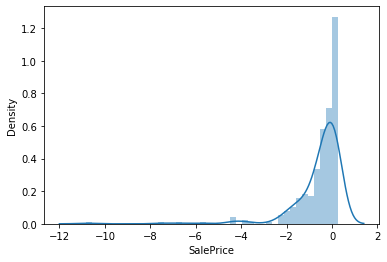

In [55]:
# 2. Distribution of Error
p=sns.distplot(Residual, kde=True)

### Conclusion:   
####            * Model has too many features so model will likely to Overfit
####            * Residual Analysis: Model fails to meet 'Residual Assumption' 

### 1.(b) Linear Regression using RFE

#### Feature selection using RFE

In [56]:
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
#SFS=SequentialFeatureSelector

rfe=RFE(Linear_Reg, n_features_to_select=20 , step=1)

rfe.fit(X_train,y_train)

rfe_features=rfe.ranking_.tolist()

rfe_data= pd.DataFrame({'Features': X_train.columns, 'RFE_Bool':rfe_features })

#Top 30 Features
#RFE=train.iloc[sfs.ranking_]

#RFE Column Name
RFE_columns=train[rfe_data['Features'][rfe_data['RFE_Bool']==1]].columns

### Linear Regression with RFE features

#### Train Test Split with RFE features 

In [57]:
train[RFE_columns]

,GrLivArea,Condition2_Others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_No Basement,BsmtExposure_Missing,BsmtFinType2_Missing,BsmtHalfBath_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_2,Fireplaces_3,GarageCars_3,GarageCars_4,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Partial
0,0.380070,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,-0.312090,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.497489,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0.390885,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1.134029,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1456,0.940904,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1457,1.353418,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1458,-0.596369,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [58]:
X_RFE=train[RFE_columns]
y=train['SalePrice']

X_train,X_test, y_train,y_test= train_test_split(X_RFE, y, test_size=0.2, random_state=99)

In [59]:
X_train.shape

(1168, 20)

#### Linear Model with RFE Features

In [60]:
lr=LinearRegression()
lr_fit=lr.fit(X_train,y_train)

In [61]:
lr_fit.coef_

array([ 0.45429831, -0.4812225 , -1.03601194, -0.53490637, -0.86058351,
       -0.39109174, -0.39109174, -0.39109174, -0.78790525, -1.05342535,
       -0.50047271, -0.81732077,  0.44737147, -0.63661979,  0.56479286,
        0.26993001, -0.83501062, -0.80129403,  0.28855732, -0.65576936])

In [62]:
#Prediction-Train
y_train_pred=lr_fit.predict(X_train)

#Prediction-Test
y_test_pred= lr_fit.predict(X_test)

In [63]:
#R2 Score (Train)
from sklearn.metrics import r2_score
print(f"R2 Score for Train data is:{r2_score(y_train, y_train_pred)}")
#print(r2_score(y_train, y_pred_train)      
print(f"R2 Score for Train data is:{r2_score(y_test, y_test_pred)}")      

R2 Score for Train data is:0.7864319919878301
R2 Score for Train data is:0.7580393985514957


In [64]:
#RSS (Residual Sum of Square)
RSS=np.sum(np.square(y_test, y_test_pred))

#MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_test_pred)

#RMSE
RMSE=MSE**0.5

print(f"RSS for Linear Reg. is: {RSS}")
print(f"MSE for Linear Reg. is: {MSE}")
print(f"RMSE for Linear Reg. is: {RMSE}")

RSS for Linear Reg. is: 210.33799552275474
MSE for Linear Reg. is: 1.7455312102733744
RMSE for Linear Reg. is: 1.3211855321162786


## 2. Ridge Regression

In [65]:
#Creating Train Test Split (withou RFE Data)
X=train.drop(columns=['SalePrice'])
y=train['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=99)


In [207]:
X_train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,...,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_Others,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
542,0.473684,0.163414,1998,1999,0.000000,1.310448,0.333720,1998.0,0.426501,0.464286,...,0,1,0,0,1,0,0,0,1,0
1406,0.052632,-0.255311,1972,2007,0.000000,-0.444776,-1.075319,1988.0,-0.347826,0.345238,...,0,1,0,0,1,0,0,0,1,0
338,1.157895,1.152792,1984,1998,0.000000,0.430846,0.242565,1984.0,-0.165631,0.642857,...,0,0,0,0,1,0,0,0,1,0
17,0.157895,0.324234,1967,1967,0.000000,-1.973134,-0.259560,1967.0,0.149068,0.000000,...,0,0,0,0,1,0,0,0,1,0
1313,2.052632,1.308177,1999,1999,1.004566,0.799005,1.753573,1999.0,1.238095,3.976190,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,-0.473684,-0.266428,1925,1950,0.000000,0.377114,0.355350,1925.0,0.397516,2.035714,...,1,0,0,0,1,0,0,0,1,0
1192,-0.473684,0.030015,1925,1994,0.000000,-0.576119,0.012360,1925.0,-0.952381,0.000000,...,0,0,0,0,1,0,0,0,1,0
1209,0.842105,0.173790,2006,2006,2.557078,1.330348,0.302820,2006.0,0.082816,1.916667,...,0,0,0,0,0,0,0,0,0,1
1059,0.000000,0.443799,1932,1950,2.922374,-0.273632,0.814214,1977.0,-0.198758,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [66]:
# Hyper Parameter Tuning

params= {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 75, 100, 150, 175,200]}

from sklearn.linear_model import Ridge
ridge=Ridge()

#Cross validation
folds=5

from sklearn.model_selection import GridSearchCV
model_cv=GridSearchCV(estimator=ridge, 
                      param_grid=params, 
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
    
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 75, 100,
                                   150, 175, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
#Checki g for best parameter 
print(model_cv.best_params_)

{'alpha': 50}


In [68]:
# Hyper parametertuning again 
params={'alpha':[35,40,42,43,44,45,46,47,48,49,50,51,52,55,60,65]}
#params= {'alpha': list(range(40,60))}

from sklearn.linear_model import Ridge
ridge=Ridge()

#CV
folds=5

from sklearn.model_selection import GridSearchCV
model_cv= GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1
                       )

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [35, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                                   51, 52, 55, 60, 65]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
#Best es
model_cv.best_params_


{'alpha': 46}

In [70]:
# Ridge Regression model with Lambda=53

ridge_reg=Ridge(alpha=46)
ridge_reg.fit=ridge_reg.fit(X_train, y_train)


In [71]:
#Ridge Coefficients
ridge_reg.fit.coef_


array([-2.27456595e-02,  2.14276278e-02,  2.51364245e-03,  4.79400024e-03,
        4.53849299e-02,  8.06492280e-02,  3.34264609e-01,  9.27199878e-05,
        4.59775965e-02,  2.89372707e-02,  1.01686670e-02,  1.30717769e-04,
        7.23533504e-04,  7.86621958e-04, -1.57486893e-04, -6.97858409e-06,
       -2.87449869e-02, -1.01404626e-02, -1.58290376e-02,  4.16195821e-02,
        6.92215151e-03,  2.69131275e-04, -9.95540024e-03, -5.38304335e-02,
        3.78840493e-03,  6.14218899e-02, -2.28463652e-02,  4.65803633e-02,
        4.36520610e-02, -5.78348694e-02, -1.53846228e-02,  8.58767780e-02,
       -3.61649248e-02,  7.02932666e-02,  0.00000000e+00,  7.26509690e-02,
       -3.75456218e-02, -2.99437401e-03, -2.12607921e-02,  4.06635973e-02,
       -1.68042410e-02, -1.12102116e-01, -8.21540288e-04,  3.79482316e-03,
        7.83730037e-02,  8.26668434e-02, -1.12333468e-01, -5.38649577e-02,
       -1.06042935e-01,  1.67959992e-02,  1.02201653e-02, -2.75165841e-02,
        3.31981395e-03, -

In [72]:
#Ridge Estimates with Feature names

ridge_estimates=ridge_reg.fit.coef_.tolist()
features=X_train.columns

#Ridge_Feature_Estimates
Ridge_Coeff=pd.DataFrame({'Feature': features,'Estimates': ridge_estimates})

#creating new column of estimates, (to remove -ve sign) 
#Ridge_Coeff['Estimates_New']= np.square(ridge_estimates)**0.5


Ridge_Coeff.sort_values(by='Estimates', ascending=False)

Ridge_Coeff['Feature']

0                LotFrontage
1                    LotArea
2                  YearBuilt
3               YearRemodAdd
4                 MasVnrArea
               ...          
191    SaleCondition_AdjLand
192     SaleCondition_Alloca
193     SaleCondition_Family
194     SaleCondition_Normal
195    SaleCondition_Partial
Name: Feature, Length: 196, dtype: object

In [73]:
#Prediction on Train data
y_train_pred=ridge_reg.fit.predict(X_train)


#Prediction on Train data
y_test_pred=ridge_reg.fit.predict(X_test)


In [74]:
# R2 Score
print(f"R2 Score for Ridge Regression on Train data is:{r2_score(y_train, y_train_pred)}")
print(f"R2 Score for Ridge Regression on Test data is:{r2_score(y_test, y_test_pred)}")

R2 Score for Ridge Regression on Train data is:0.8603388015401633
R2 Score for Ridge Regression on Test data is:0.8769676663552533


#### Metrics to check Model Performance

In [75]:
#RSS
RSS= np.square(np.sum(y_test-y_test_pred))
#MSE
MSE=mean_squared_error(y_test,y_test_pred)
#RMSE
RMSE=MSE**0.5

print(f"RSS for Ridge Reg. is: {RSS}")
print(f"RSS for Ridge Reg. is: {MSE}")
print(f"RSS for Ridge Reg. is: {RMSE}")

RSS for Ridge Reg. is: 193.10750442722028
RSS for Ridge Reg. is: 0.08597782786637777
RSS for Ridge Reg. is: 0.2932197603613675


#### Residual Analysis

Text(0, 0.5, 'Residuals')

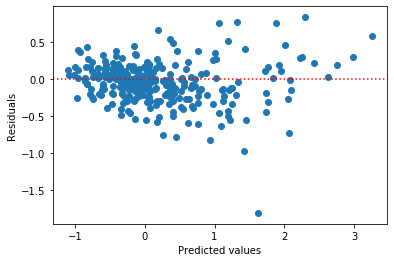

In [76]:
# 1. Residual Pattern

Residual=y_test-y_test_pred
plt.scatter(y_test_pred, Residual)
plt.axhline(y=0, color='red', linestyle=":")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

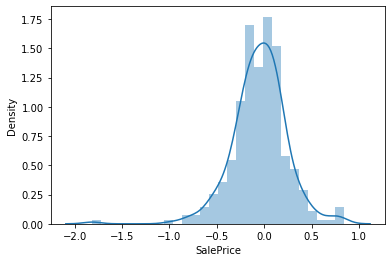

In [77]:
# 2. Residual Pattern
sns.distplot(Residual, kde=True)

### Conclusion:   
####            * Model has still too many features
####            * Residual Analysis: Model somehow  meet 'Residual Assumption' 

## 2b. Ridge with RFE

In [105]:
#Train Test split 

X=train.drop(columns=['SalePrice'])
y=train['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=99)


In [106]:
# RFE
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
#SFS=SequentialFeatureSelector

rfe=RFE(ridge_reg, n_features_to_select=20 , step=1)

rfe.fit(X_train,y_train)

rfe_features=rfe.ranking_.tolist()

rfe_data= pd.DataFrame({'Features': X_train.columns, 'RFE_Bool':rfe_features })

#Top 30 Features
#RFE=train.iloc[sfs.ranking_]

#RFE Column Name
RFE_columns=train[rfe_data['Features'][rfe_data['RFE_Bool']==1]].columns

In [107]:
X_RFE=train[RFE_columns]
y=train['SalePrice']

X_train,X_test, y_train,y_test= train_test_split(X_RFE, y, test_size=0.2, random_state=99)

In [108]:
# Hyper Parameter Tuning

params= {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 75, 100, 150, 175,200]}

from sklearn.linear_model import Ridge
ridge=Ridge()

#Cross validation
folds=5

from sklearn.model_selection import GridSearchCV
model_cv=GridSearchCV(estimator=ridge, 
                      param_grid=params, 
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
    
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 75, 100,
                                   150, 175, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
#Checki g for best parameter 
print(model_cv.best_params_)

{'alpha': 50}


In [110]:
# Hyper parametertuning again 
params={'alpha':[35,40,42,43,44,45,46,47,48,49,50,51,52,55,60,65]}
#params= {'alpha': list(range(40,60))}

from sklearn.linear_model import Ridge
ridge=Ridge()

#CV
folds=5

from sklearn.model_selection import GridSearchCV
model_cv= GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1
                       )

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [35, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                                   51, 52, 55, 60, 65]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
#Checki g for best parameter 
print(model_cv.best_params_)

{'alpha': 35}


In [117]:
# Ridge Regression model with Lambda=53

ridge_reg=Ridge(alpha=35*2)
ridge_reg.fit=ridge_reg.fit(X_train, y_train)


In [118]:
ridge_reg.coef_

array([ 0.1787453 ,  0.39422359,  0.12631853, -0.12727883, -0.14728396,
       -0.14280357,  0.14633818,  0.26908325, -0.19623482, -0.15283004,
        0.1659964 ,  0.18560084,  0.15830381,  0.15888219, -0.13950534,
        0.13565766,  0.16254794, -0.16126549,  0.34946786,  0.17576232])

In [119]:
#Ridge Estimates with Feature names

ridge_estimates=ridge_reg.fit.coef_.tolist()
features=X_train.columns

#Ridge_Feature_Estimates
Ridge_Coeff=pd.DataFrame({'Feature': features,'Estimates': ridge_estimates})

#creating new column of estimates, (to remove -ve sign) 
#Ridge_Coeff['Estimates_New']= np.square(ridge_estimates)**0.5


Ridge_Coeff.sort_values(by='Estimates', ascending=False)

,Feature,Estimates
1,GrLivArea,0.394224
18,GarageCars_3,0.349468
7,OverallQual_Others,0.269083
11,BsmtFinType1_GLQ,0.185601
0,TotalBsmtSF,0.178745
19,SaleCondition_Partial,0.175762
10,BsmtExposure_Gd,0.165996
16,Fireplaces_2,0.162548
13,FullBath_3,0.158882
12,CentralAir_Y,0.158304


In [120]:
#Prediction on Train data
y_train_pred=ridge_reg.fit.predict(X_train)


#Prediction on Train data
y_test_pred=ridge_reg.fit.predict(X_test)


In [121]:
# R2 Score
print(f"R2 Score for Ridge Regression on Train data is:{r2_score(y_train, y_train_pred)}")
print(f"R2 Score for Ridge Regression on Test data is:{r2_score(y_test, y_test_pred)}")

R2 Score for Ridge Regression on Train data is:0.8050653670212161
R2 Score for Ridge Regression on Test data is:0.834536006408126


#### Metric to check Model Peformance

In [122]:
#RSS
RSS= np.square(np.sum(y_test-y_test_pred))
#MSE
MSE=mean_squared_error(y_test,y_test_pred)
#RMSE
RMSE=MSE**0.5

print(f"RSS for Ridge Reg. is: {RSS}")
print(f"RSS for Ridge Reg. is: {MSE}")
print(f"RSS for Ridge Reg. is: {RMSE}")

RSS for Ridge Reg. is: 210.5363539764754
RSS for Ridge Reg. is: 0.1156300489284672
RSS for Ridge Reg. is: 0.340044186729412


### 3. Lasso Regression

In [123]:
X=train.drop(columns=['SalePrice'])
y=train['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=99)


In [124]:
# checking for hyperparameter
params={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,150,200,500]}

from sklearn.linear_model import Ridge, Lasso

lasso=Lasso()

folds=5

from sklearn.model_selection import GridSearchCV

model_cv=GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 150,
                                   200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
#Best Params
model_cv.best_params_

{'alpha': 0.001}

In [126]:
params= {'alpha':[.0006,.0007,.0008,.0009,.001,.002,.003,.004,.005,.006]}
folds=5

from sklearn.linear_model import Lasso
lasso=Lasso()


from sklearn.model_selection import GridSearchCV

model_cv= GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train, y_train)

model_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 0.004}

In [127]:
#Creating Lasso Regression with Best Parameter= 0.007 

lasso_reg=Lasso(alpha=.004)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.004)

In [128]:
# Estimates
lasso_reg.coef_

array([-2.40973550e-02,  1.75652085e-02,  3.23949344e-03,  5.07627971e-03,
        2.95130932e-02,  8.64625873e-02,  3.98551112e-01,  7.71897144e-05,
        0.00000000e+00,  2.61316549e-02,  0.00000000e+00,  1.34934552e-04,
        7.04897021e-04,  8.21788419e-04, -2.58617539e-04, -9.50156075e-06,
       -0.00000000e+00, -0.00000000e+00, -1.18030747e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.80134191e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -3.71525305e-03,  6.05298032e-02,
       -0.00000000e+00,  4.63513699e-02,  0.00000000e+00,  8.60982670e-02,
       -0.00000000e+00, -0.00000000e+00, -6.13271282e-03,  0.00000000e+00,
       -0.00000000e+00, -1.35282741e-01,  0.00000000e+00, -0.00000000e+00,
        5.47231364e-02,  7.15220018e-02, -1.31063872e-01, -0.00000000e+00,
       -1.83978119e-01,  6.93977417e-03,  0.00000000e+00, -2.55416045e-02,
        0.00000000e+00, -

In [129]:
pd.set_option('display.max_rows', 500)

#Estmates with Feature names
Lasso_estimates= (lasso_reg.coef_).tolist()




#Creating DataFrame with Feature with their Estimaes
Lasso_DF= pd.DataFrame({'Feature':X_train.columns, 'Estimates':Lasso_estimates})

#Total Features(features having Non Zero Coefficients)
Lasso_DF_NonZero=Lasso_DF[Lasso_DF['Estimates']!=0]

#Lasso_DF_NonZero.sort_values(by='Estimates', ascending=False) 

Lasso_DF_NonZero



,Feature,Estimates
0,LotFrontage,-0.024097
1,LotArea,0.017565
2,YearBuilt,0.003239
3,YearRemodAdd,0.005076
4,MasVnrArea,0.029513
5,TotalBsmtSF,0.086463
6,GrLivArea,0.398551
7,GarageYrBlt,0.000077
9,WoodDeckSF,0.026132
11,EnclosedPorch,0.000135


In [130]:
#Prediction
train_pred= lasso_reg.predict(X_train)
test_pred= lasso_reg.predict(X_test)

In [131]:
# R2 Score
print(f"R2 Score for Lasso Regression on Train data is:{r2_score(y_train, train_pred)}")
print(f"R2 Score for Lasso Regression on Test data is:{r2_score(y_test, test_pred)}")

R2 Score for Lasso Regression on Train data is:0.8534008725270557
R2 Score for Lasso Regression on Test data is:0.8734954956863863


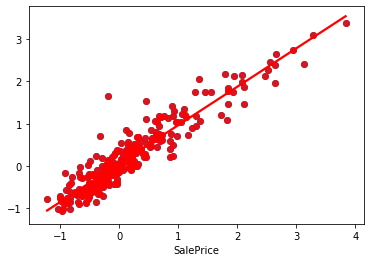

In [132]:
plt.scatter(y_test,test_pred)
sns.regplot(x=y_test,y=test_pred,ci=None,color ='red');


#### Metric to check model performance 

In [133]:
#RSS
RSS= np.square(np.sum(y_test-test_pred))
MSE=mean_squared_error(y_test,test_pred)
RMSE=MSE**0.5

print(f"RSS for Lasso Reg. is: {RSS}")
print(f"RSS for Lasso Reg. is: {MSE}")
print(f"RSS for Lasso Reg. is: {RMSE}")

RSS for Lasso Reg. is: 191.57940564041658
RSS for Lasso Reg. is: 0.08840426068486368
RSS for Lasso Reg. is: 0.29732853997701547


#### Residual Analysis

Text(0, 0.5, 'Residuals')

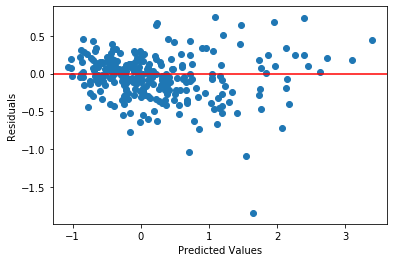

In [134]:
# Checking for residual pattern

Residual=y_test-test_pred
plt.scatter(test_pred,Residual)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")


Text(0.5, 0, 'Residual')

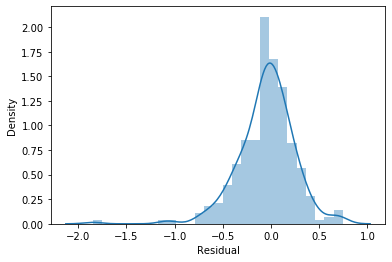

In [135]:
#Checking for Residual Distribution
sns.distplot(Residual,kde=True)
plt.xlabel('Residual')


### Conclusion:  
####            * R2 Score for Train and Test shows better results compare to Logistic Regression 
####            * Model has now less features 
####            * Residual Analysis: Model almost  meet 'Residual Assumption' 

## 3(b). Lasso Regression with RFE Features

In [136]:
#Train Test split 

X=train.drop(columns=['SalePrice'])
y=train['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=99)


In [137]:
# RFE
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
#SFS=SequentialFeatureSelector

rfe=RFE(lasso_reg, n_features_to_select=20 , step=1)

rfe.fit(X_train,y_train)

rfe_features=rfe.ranking_.tolist()

rfe_data= pd.DataFrame({'Features': X_train.columns, 'RFE_Bool':rfe_features })

#Top 30 Features
#RFE=train.iloc[sfs.ranking_]

#RFE Column Name
RFE_columns=train[rfe_data['Features'][rfe_data['RFE_Bool']==1]].columns

In [138]:
RFE_columns

Index(['GrLivArea', 'LotConfig_CulDSac', 'Neighborhood_Edwards',
       'Condition1_Others', 'BldgType_Others', 'OverallQual_8',
       'OverallQual_Others', 'ExterQual_TA', 'Foundation_PConc',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'CentralAir_Y', 'FullBath_3',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Typ',
       'Fireplaces_2', 'GarageCars_3', 'SaleCondition_Partial'],
      dtype='object')

#### Train-Test Split

In [139]:
X_RFE=train[RFE_columns]
y=train['SalePrice']

X_train,X_test, y_train,y_test= train_test_split(X_RFE, y, test_size=0.2, random_state=99)

In [140]:
#Getting best paramaters for Lasso Reg.

# checking for hyperparameter
params={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,150,200,500]}


lasso=Lasso()

folds=5

from sklearn.model_selection import GridSearchCV

model_cv=GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train, y_train)

model_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 0.001}

In [141]:
 #Getting again best paramaters for Lasso Reg .

params= {'alpha':[.0006,.0007,.0008,.0009,.001,.002,.003,.004,.005,.006]}
folds=5

from sklearn.linear_model import Lasso
lasso=Lasso()


from sklearn.model_selection import GridSearchCV

model_cv= GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train, y_train)

model_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 0.002}

In [148]:
#Creating Lasso Regression with Best Parameter= 0.007 

lasso_reg=Lasso(alpha=.002*2)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.004)

In [143]:
lasso_reg.coef_

array([ 0.44929583,  0.27347323, -0.23824886, -0.18543411, -0.17233041,
        0.22889442,  0.41788875, -0.24286938,  0.20231833,  0.3043303 ,
       -0.21575659,  0.27287675,  0.32883298, -0.58730943, -0.36889709,
       -0.49490689,  0.23996884,  0.3078562 ,  0.46337736,  0.23637238])

In [149]:
#Estmates with Feature names
Lasso_estimates= (lasso_reg.coef_).tolist()



#Creating DataFrame with Feature with their Estimaes
Lasso_DF= pd.DataFrame({'Feature':X_train.columns, 'Estimates':Lasso_estimates})

#Total Features(features having Non Zero Coefficients)
Lasso_DF_NonZero=Lasso_DF[Lasso_DF['Estimates']!=0]

#Lasso_DF_NonZero.sort_values(by='Estimates', ascending=False) 

#Lasso_DF.sort_values(by=['Estimates'])

Lasso_DF_NonZero

,Feature,Estimates
0,GrLivArea,0.465042
1,LotConfig_CulDSac,0.236918
2,Neighborhood_Edwards,-0.208720
3,Condition1_Others,-0.174477
4,BldgType_Others,-0.159028
5,OverallQual_8,0.213353
6,OverallQual_Others,0.422097
7,ExterQual_TA,-0.249680
8,Foundation_PConc,0.201851
9,BsmtExposure_Gd,0.294811


In [150]:
#Prediction
train_pred= lasso_reg.predict(X_train)
test_pred= lasso_reg.predict(X_test)

In [151]:
# R2 Score
print(f"R2 Score for Lasso Regression on Train data is:{r2_score(y_train, train_pred)}")
print(f"R2 Score for Lasso Regression on Test data is:{r2_score(y_test, test_pred)}")

R2 Score for Lasso Regression on Train data is:0.8208551036583852
R2 Score for Lasso Regression on Test data is:0.8274887040990156


In [152]:
# Model metric to check performance
#RSS
RSS= np.square(np.sum(y_test-test_pred))
#MSE
MSE=mean_squared_error(y_test,test_pred)
#RMSE
RMSE=MSE**0.5

print(f"RSS for Lasso Reg. is: {RSS}")
print(f"RSS for Lasso Reg. is: {MSE}")
print(f"RSS for Lasso Reg. is: {RMSE}")

RSS for Lasso Reg. is: 147.4786865651297
RSS for Lasso Reg. is: 0.12055486606316104
RSS for Lasso Reg. is: 0.34721011803108653


## 3(c). Lasso Regression with RFE and post removing Top 5 Features

In [161]:
#Train Test split 

X=train.drop(columns=['SalePrice', 'KitchenQual_Fa', 'KitchenQual_TA', 'GarageCars_3', 'GrLivArea', 'OverallQual_Others'])
y=train['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=99)


In [162]:
# RFE
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
#SFS=SequentialFeatureSelector

rfe=RFE(lasso_reg, n_features_to_select=20 , step=1)

rfe.fit(X_train,y_train)

rfe_features=rfe.ranking_.tolist()

rfe_data= pd.DataFrame({'Features': X_train.columns, 'RFE_Bool':rfe_features })

#Top 30 Features
#RFE=train.iloc[sfs.ranking_]

#RFE Column Name
RFE_columns=train[rfe_data['Features'][rfe_data['RFE_Bool']==1]].columns

In [163]:
RFE_columns

Index(['TotalBsmtSF', 'GarageArea', 'LotConfig_CulDSac', 'BldgType_Others',
       'OverallQual_8', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'Electrical_30',
       'FullBath_1', 'FullBath_3', 'HalfBath_1', 'BedroomAbvGr_4',
       'TotRmsAbvGrd_Others', 'Fireplaces_2', 'FireplaceQu_No Fireplace',
       'GarageCars_2'],
      dtype='object')

#### Train-Test Split

In [164]:
X_RFE=train[RFE_columns]
y=train['SalePrice']

X_train,X_test, y_train,y_test= train_test_split(X_RFE, y, test_size=0.2, random_state=99)

In [165]:
#Getting best paramaters for Lasso Reg.

# checking for hyperparameter
params={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,150,200,500]}


lasso=Lasso()

folds=5

from sklearn.model_selection import GridSearchCV

model_cv=GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train, y_train)

model_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 0.001}

In [166]:
 #Getting again best paramaters for Lasso Reg .

params= {'alpha':[.0006,.0007,.0008,.0009,.001,.002,.003,.004,.005,.006]}
folds=5

from sklearn.linear_model import Lasso
lasso=Lasso()


from sklearn.model_selection import GridSearchCV

model_cv= GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)

model_cv.fit(X_train, y_train)

model_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'alpha': 0.004}

In [167]:
#Creating Lasso Regression with Best Parameter= 0.007 

lasso_reg=Lasso(alpha=.004)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.004)

In [168]:
lasso_reg.coef_

array([ 0.26183306,  0.18820137,  0.17825298, -0.2345372 ,  0.15084076,
       -0.30823758,  0.13915745, -0.29116521, -0.32566562,  0.20418171,
        0.18807098, -0.19858521, -0.20928643,  0.65290334,  0.2698333 ,
        0.15627055,  0.33532749,  0.31468361, -0.22883989, -0.17139084])

In [169]:
#Estmates with Feature names
Lasso_estimates= (lasso_reg.coef_).tolist()



#Creating DataFrame with Feature with their Estimaes
Lasso_DF= pd.DataFrame({'Feature':X_train.columns, 'Estimates':Lasso_estimates})

#Total Features(features having Non Zero Coefficients)
Lasso_DF_NonZero=Lasso_DF[Lasso_DF['Estimates']!=0]

#Lasso_DF_NonZero.sort_values(by='Estimates', ascending=False) 

#Lasso_DF.sort_values(by=['Estimates'])

Lasso_DF_NonZero

,Feature,Estimates
0,TotalBsmtSF,0.261833
1,GarageArea,0.188201
2,LotConfig_CulDSac,0.178253
3,BldgType_Others,-0.234537
4,OverallQual_8,0.150841
5,ExterQual_TA,-0.308238
6,Foundation_PConc,0.139157
7,BsmtQual_Gd,-0.291165
8,BsmtQual_TA,-0.325666
9,BsmtExposure_Gd,0.204182


In [63]:
data={'Id': [1,2,3,4,np.nan,6], 'Sal': [200,300,600,np.nan,np.nan,np.nan], 'x':[1,1,2,3,4,5], 'y':[4,7,8,9,4,5]}
df=pd.DataFrame(data)

#sns.scatterplot(data['Id'], data['Sal'])
cf=['Sal']

df


,Id,Sal,x,y
0,1.0,200.0,1,4
1,2.0,300.0,1,7
2,3.0,600.0,2,8
3,4.0,NaN,3,9
4,NaN,NaN,4,4
5,6.0,NaN,5,5


In [72]:
#df['x'][(df['x']==2)|(df['x']==3)]='Others'
df

,Id,Sal,x,y
0,1.0,200.0,1,4
1,2.0,300.0,1,7
2,3.0,600.0,Others,8
3,4.0,NaN,Others,9
4,NaN,NaN,4,4
5,6.0,NaN,5,5


In [554]:
df=df.drop(columns=['x','y'])

df.head()

KeyError: "['x' 'y'] not found in axis"

In [219]:
df['Sal'].sum()/np.count_nonzero(df['Sal'], axis=0)

366.6666666666667

In [218]:
np.count_nonzero(df['Sal'], axis=0)

3

In [224]:
np.log(df['Sal'].replace(0, np.nan))

0    5.298317
1    5.703782
2    6.396930
3         NaN
Name: Sal, dtype: float64

In [226]:
df['Sal'].replace(np.nan,0)

0    200
1    300
2    600
3      0
Name: Sal, dtype: int64